In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import os
import pandas as pd
import numpy as np
import sys
from tqdm import tqdm
import h5py
sys.path.append('/home/jma819/post_cmfe_analysis')
#sys.path.append('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis')
from matplotlib import pyplot as plt
import dlc_utils

In [3]:
from importlib import reload
reload(dlc_utils)

<module 'dlc_utils' from '/home/jma819/post_cmfe_analysis/dlc_utils.py'>

In [4]:
#dlc_directory = '/volumes/My_Passport/dlc_analysis/behavcamvideos/open_field_miniscope/'
dlc_directory = '/projects/b1118/behaviorvideos/'

In [5]:
experiment_folders = [folder for folder in os.listdir(dlc_directory) if '_H' in folder]

In [6]:
experiment_folders

['GRIN013_H13_M33_S54']

In [7]:
for folder in tqdm(experiment_folders):
    output_directory = dlc_directory+folder+'/'
    session_name = folder
    print(folder)
    dlc_output_files = os.listdir(output_directory)
    dlc_output_files.sort()
    
    names = []
    dlc_dfs = []
    

100%|██████████| 1/1 [00:00<00:00, 679.90it/s]

GRIN013_H13_M33_S54


In [8]:
dlc_output_files

['GRIN013_H13_M33_S54_compiled_session_02112021.csv',
 'GRIN013_H13_M33_S54_compiled_session_02112021.h5',
 'GRIN013_H13_M33_S54_dlc_tracking_foranalysis_02112021.csv',
 'behavCam01.avi',
 'behavCam01DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5',
 'behavCam01DLC_resnet50_Open_Field_v2Jan27shuffle1_150000_labeled.mp4',
 'behavCam01DLC_resnet50_Open_Field_v2Jan27shuffle1_150000includingmetadata.pickle',
 'behavCam02.avi',
 'behavCam02DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5',
 'behavCam02DLC_resnet50_Open_Field_v2Jan27shuffle1_150000_labeled.mp4',
 'behavCam02DLC_resnet50_Open_Field_v2Jan27shuffle1_150000includingmetadata.pickle',
 'behavCam03.avi',
 'behavCam03DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5',
 'behavCam03DLC_resnet50_Open_Field_v2Jan27shuffle1_150000_labeled.mp4',
 'behavCam03DLC_resnet50_Open_Field_v2Jan27shuffle1_150000includingmetadata.pickle',
 'behavCam04.avi',
 'behavCam04DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5',
 'behavCam04DLC_resnet50_

In [9]:
dlc_output = pd.read_hdf('/projects/b1118/behaviorvideos/GRIN013_H13_M33_S54/behavCam02DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5')
#dlc_output = dlc_utils.calculate_centroid(dlc_output)
#should also append a time column for alignment to avi file
time_within_movie_seconds = np.linspace(0, 50, 1000)

In [10]:
dlc_output.head()

scorer    DLC_resnet50_Open_Field_v2Jan27shuffle1_150000              \
bodyparts                                       ear_left               
coords                                                 x           y   
0                                             292.508667  357.506012   
1                                             292.862366  357.351593   
2                                             293.086090  357.166443   
3                                             292.763947  357.294891   
4                                             293.038818  357.544952   

scorer                                                               \
bodyparts              ear_right                          tail_base   
coords    likelihood           x           y likelihood           x   
0           0.074033  300.513000  364.337311   0.180357  253.353836   
1           0.093176  302.479034  370.733826   0.303444  253.549255   
2           0.185885  302.335846  370.647156   0.392228  253.383041   
3           0.114862  301.174866  364.848114   0.248863  253.609161   
4           0.089646  302.475433  370.651306   0.233052  253.424500   

scorer                                                                   
bodyparts                        miniscope_light                         
coords              y likelihood               x           y likelihood  
0          375.582794        1.0      307.633392  355.723877   0.008590  
1          375.880615        1.0      307.503723  355.476562   0.008776  
2          375.891968        1.0      307.716858  355.432251   0.015284  
3          375.824310        1.0      307.500061  355.350494   0.008182  
4          375.775513        1.0      307.749084  355.445374   0.010289

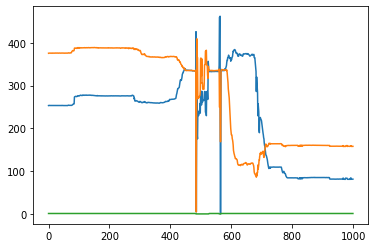

In [11]:
label = 'tail_base'
plt.plot(dlc_output['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000'][label]['x'])
plt.plot(dlc_output['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000'][label]['y'])
plt.plot(dlc_output['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000'][label]['likelihood'])

In [12]:
## find regions where likelihood is less than maybe .9-1
low_likelihood_indicies = dlc_output.loc[dlc_output['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000'][label]['likelihood']<0.9].index
#if want to get time 
#low_likelihood_times = time_within_movie_seconds[list(low_likelihood_indicies)]
#remove coordinate values from low likelihood regions 
dlc_output.loc[low_likelihood_indicies, ('DLC_resnet50_Open_Field_v2Jan27shuffle1_150000', 'tail_base', 'x')]=np.nan
dlc_output.loc[low_likelihood_indicies, ('DLC_resnet50_Open_Field_v2Jan27shuffle1_150000', 'tail_base', 'y')]=np.nan

In [13]:
#dlc_output.loc[low_likelihood_indicies]

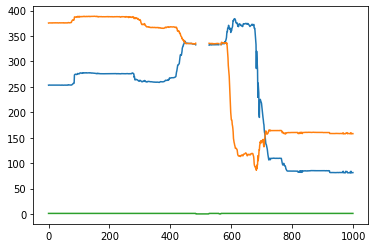

In [14]:
label = 'tail_base'
plt.plot(dlc_output['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000'][label]['x'])
plt.plot(dlc_output['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000'][label]['y'])
plt.plot(dlc_output['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000'][label]['likelihood'])

In [15]:
coordinates_delta_df = dlc_utils.difference_df(dlc_output)

In [16]:
coordinates_delta_df.head()

miniscope_light           tail_base           ear_right            \
coords               x         y         x         y         x         y   
0                  NaN       NaN       NaN       NaN       NaN       NaN   
1            -0.129669 -0.247314  0.195419  0.297821  1.966034  6.396515   
2             0.213135 -0.044312 -0.166214  0.011353 -0.143188 -0.086670   
3            -0.216797 -0.081757  0.226120 -0.067657 -1.160980 -5.799042   
4             0.249023  0.094879 -0.184662 -0.048798  1.300568  5.803192   

        ear_left            
coords         x         y  
0            NaN       NaN  
1       0.353699 -0.154419  
2       0.223724 -0.185150  
3      -0.322144  0.128448  
4       0.274872  0.250061

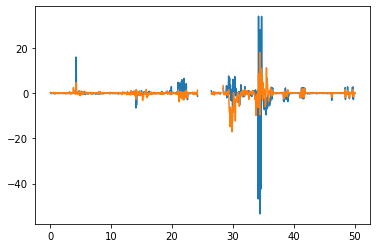

In [17]:
# much better but still need to remove instances of rapid switching here 
label = 'tail_base'
plt.plot(time_within_movie_seconds, coordinates_delta_df[label]['x'])
plt.plot(time_within_movie_seconds, coordinates_delta_df[label]['y'])


In [18]:
df_columns = list(dlc_output.columns)
velocity_df = pd.DataFrame(np.transpose(np.array([np.array([dlc_utils.velocity(coordinates_delta_df[body_part]['x'].values[frame],coordinates_delta_df[body_part]['y'].values[frame]) for frame in range(len(coordinates_delta_df))]) for body_part in list(set([df_columns[item][1] for item in range(len(df_columns))]))])), 
                                       columns=list(set([df_columns[item][1] for item in range(len(df_columns))]))) 
for body_part in list(set([df_columns[item][1] for item in range(len(df_columns))])):
    velocity_df[body_part+'_likelihood']=dlc_output[df_columns[0][0]][body_part]['likelihood'].values

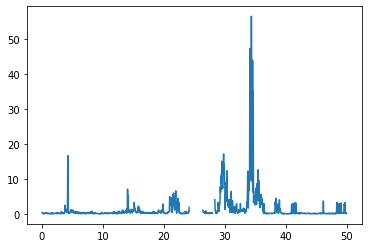

In [19]:
## for now this might be good enough to pick out regions for later review
label = 'tail_base'
plt.plot(time_within_movie_seconds, velocity_df[label])


In [20]:
# check if alignment to msCam videos is working 

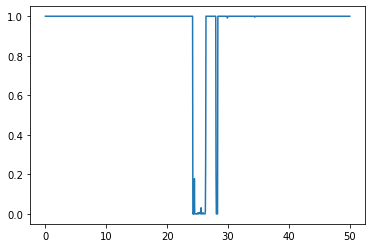

In [21]:
velocity_df
plt.plot(time_within_movie_seconds, velocity_df['tail_base_likelihood'])

In [22]:
## compiling all files in recording session to check msCam alignment
dlc_directory 

'/projects/b1118/behaviorvideos/'

In [23]:
session_name

'GRIN013_H13_M33_S54'

In [25]:
for folder in tqdm(experiment_folders):
    output_directory = dlc_directory+folder+'/'
    session_name = folder
    print(folder)
    dlc_output_files = os.listdir(output_directory)
    dlc_output_files.sort()
    
    names = []
    dlc_dfs = []
    for output_file in dlc_output_files[0:10]:
        if output_file.endswith('000.h5'):
            print(output_file)
            dlc_output = pd.read_hdf(output_directory + output_file)
            dlc_output = dlc_utils.calculate_centroid(dlc_output)
            dlc_output.head()
            coordinates_delta_df = dlc_utils.difference_df(dlc_output)
            df_columns = list(dlc_output.columns)
            print('calculating velocity')
            velocity_df = pd.DataFrame(np.transpose(np.array([np.array([dlc_utils.velocity(coordinates_delta_df[body_part]['x'].values[frame],coordinates_delta_df[body_part]['y'].values[frame]) for frame in range(len(coordinates_delta_df))]) for body_part in list(set([df_columns[item][1] for item in range(len(df_columns))]))])), 
                                       columns=list(set([df_columns[item][1] for item in range(len(df_columns))]))) 
            for body_part in list(set([df_columns[item][1] for item in range(len(df_columns))])):
                velocity_df[body_part+'_likelihood']=dlc_output[df_columns[0][0]][body_part]['likelihood'].values
            
            names.append(output_file)
            dlc_dfs.append(velocity_df)

    session_compiled = pd.concat(dlc_dfs, keys=names)

    #save compiled session 
    session_compiled.to_hdf(output_directory+session_name+'_compiled_session_02112021.h5', key='df')
    session_compiled.to_csv(output_directory+session_name+'_compiled_session_02112021.csv')
    
    #create behavior data aligned to the msCam frames
    aligned = dlc_utils.downsample_dlc_to_behavior(output_directory+session_name+'_compiled_session_02112021.h5', output_directory+'timestamp.dat')
    aligned.reset_index(inplace=True)
    aligned['msCamFrame'] = aligned.index.values
    aligned = aligned.set_index(pd.to_timedelta(np.linspace(0, len(aligned)*(1/20), len(aligned)), unit='s'), drop=False)

    #smooth data by downsampling and interpolating 
    interpolated = dlc_utils.downsample_and_interpolate(aligned, '.05S', '1S', 'linear')
    interpolated.to_csv(output_directory+session_name+'_dlc_tracking_foranalysis_02112021.csv')

    output_directory+session_name+'_dlc_tracking_foranalysis.csv'


  0%|          | 0/1 [00:00<?, ?it/s]

GRIN013_H13_M33_S54
behavCam01DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
calculating velocity
behavCam02DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
calculating velocity




  0%|          | 0/35701 [00:00<?, ?it/s]

  0%|          | 40/35701 [00:00<01:29, 397.06it/s]

  0%|          | 79/35701 [00:00<01:30, 393.77it/s]

  0%|          | 119/35701 [00:00<01:30, 392.81it/s]

  0%|          | 160/35701 [00:00<01:30, 393.86it/s]

  1%|          | 204/35701 [00:00<01:27, 404.57it/s]

  1%|          | 239/35701 [00:00<01:31, 385.87it/s]

  1%|          | 288/35701 [00:00<01:26, 411.56it/s]

  1%|          | 333/35701 [00:00<01:23, 421.91it/s]

  1%|          | 376/35701 [00:00<01:23, 423.14it/s]

  1%|          | 423/35701 [00:01<01:21, 434.08it/s]

  1%|▏         | 466/35701 [00:01<01:30, 390.09it/s]

  1%|▏         | 506/35701 [00:01<01:33, 374.90it/s]

  2%|▏         | 544/35701 [00:01<01:38, 357.24it/s]

  2%|▏         | 581/35701 [00:01<01:39, 351.91it/s]

  2%|▏         | 619/35701 [00:01<01:37, 359.04it/s]

  2%|▏         | 656/35701 [00:01<01:39, 353.90it/s]

  2%|▏         | 695/35701 [00:01<01:36, 362.65it/s]

  2%|▏         | 732/35701 [00:01<01:37

In [27]:
aligned.iloc[0:20]

,level_0,index,ear_right,miniscope_light,ear_left,centroid,tail_base,ear_right_likelihood,miniscope_light_likelihood,ear_left_likelihood,centroid_likelihood,tail_base_likelihood,msCamFrame
00:00:00,1,1,0.168808,0.088904,0.183984,0.027661,0.020989,0.544328,0.000909,0.846108,0.597836,1.0,0
00:00:00.050037,2,2,0.286755,0.033209,0.141515,0.055550,0.223639,0.568832,0.001060,0.892291,0.615546,1.0,1
00:00:00.100075,4,4,0.107551,0.069460,0.226060,0.137618,0.208928,0.496595,0.000906,0.860816,0.589579,1.0,2
00:00:00.150112,6,6,0.329729,0.156620,0.165341,0.115281,0.068490,0.554400,0.000895,0.866591,0.605472,1.0,3
00:00:00.200150,7,7,0.238655,12.688243,0.165833,3.154783,0.076967,0.490529,0.000787,0.790919,0.570559,1.0,4
00:00:00.250187,9,9,0.394208,12.858064,0.262567,3.385960,0.191614,0.569846,0.000753,0.765684,0.584071,1.0,5
00:00:00.300225,10,10,0.089255,0.262777,0.179268,0.025092,0.192072,0.355459,0.000701,0.684243,0.510101,1.0,6
00:00:00.350262,12,12,0.165313,12.664859,0.128685,3.136071,0.210194,0.488582,0.000837,0.837667,0.581771,1.0,7
00:00:00.400300,13,13,0.093586,12.726525,0.254413,3.214286,0.168719,0.508493,0.000835,0.797028,0.576589,1.0,8
00:00:00.450338,15,15,0.242689,0.099636,0.158548,0.149423,0.109330,0.549060,0.000805,0.804943,0.588702,1.0,9


In [28]:
frame_clock_df = pd.read_table(output_directory+'timestamp.dat')

In [29]:
frame_clock_df

,camNum,frameNum,sysClock,buffer
0,1,1,1,1
1,0,1,182663,1
2,1,2,33,1
3,1,3,66,1
4,0,2,49,1
...,...,...,...,...
89280,1,53582,1786096,1
89281,1,53583,1786129,1
89282,0,35700,1786115,1
89283,1,53584,1786160,1


In [30]:
msCam_timestamps = frame_clock_df[frame_clock_df['camNum'] == 0].set_index('frameNum')
behavCam_timestamps = frame_clock_df[frame_clock_df['camNum'] == 1].set_index('frameNum')

In [31]:
msCam_timestamps['sysClock'][1] = 0
behavCam_timestamps['sysClock'][1] = 0

In [34]:
msCam_timestamps.iloc[0:20]

,camNum,sysClock,buffer
frameNum,,,
1,0,0,1
2,0,49,1
3,0,102,1
4,0,155,1
5,0,208,1
6,0,256,1
7,0,303,1
8,0,351,1
9,0,405,1


In [35]:
behavCam_timestamps.iloc[0:20]

,camNum,sysClock,buffer
frameNum,,,
1,1,0,1
2,1,33,1
3,1,66,1
4,1,99,1
5,1,133,1
6,1,164,1
7,1,196,1
8,1,227,1
9,1,260,1


In [ ]:
msCam_timestamps = dlc_utils.align_behavior_data(msCam_timestamps, behavCam_timestamps)
#msCam_timestamps.reset_index(inplace=True)